In [36]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import os
import glob
import matplotlib.image as mpimg
from pathlib import Path

In [102]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define directories
original_data_dir = 'compdata2/Datasets/old_hungarian'  # Path to your original data directory
base_dir = 'data_split_old_hungarian2'  # Base directory to save the split data

# Create base directory if it does not exist
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Split dataset into training-validation and testing
trainval_dir = os.path.join(base_dir, 'trainval')
test_dir = os.path.join(base_dir, 'test')
os.mkdir(trainval_dir)
os.mkdir(test_dir)

# Move data to trainval and test directories
for class_name in os.listdir(original_data_dir):
    class_dir = os.path.join(original_data_dir, class_name)
    trainval_class_dir = os.path.join(trainval_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.mkdir(trainval_class_dir)
    os.mkdir(test_class_dir)
    filenames = os.listdir(class_dir)
    trainval_filenames, test_filenames = train_test_split(filenames, test_size=0.2, random_state=42)
    for filename in trainval_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(trainval_class_dir, filename)
        shutil.copyfile(src, dst)
    for filename in test_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_class_dir, filename)
        shutil.copyfile(src, dst)

# Split training-validation set into training and validation
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
os.mkdir(train_dir)
os.mkdir(val_dir)

for class_name in os.listdir(trainval_dir):
    class_dir = os.path.join(trainval_dir, class_name)
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.mkdir(train_class_dir)
    os.mkdir(val_class_dir)
    filenames = os.listdir(class_dir)
    train_filenames, val_filenames = train_test_split(filenames, test_size=0.25, random_state=42)  # 60% train, 20% validation
    for filename in train_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_class_dir, filename)
        shutil.copyfile(src, dst)
    for filename in val_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(val_class_dir, filename)
        shutil.copyfile(src, dst)


In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 64
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load and split data from the same directory
train_generator = datagen.flow_from_directory(
    'data_split_old_hungarian/train',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'data_split_old_hungarian/val',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' )
test_generator = datagen.flow_from_directory(
    'data_split_old_hungarian/test',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset for testing data
)

Found 2294 images belonging to 18 classes.
Found 180 images belonging to 18 classes.
Found 180 images belonging to 18 classes.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [41]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer='l1',
    bias_regularizer='l1',),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu',activity_regularizer='l1',),
    Dense(256, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=200,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.0632 - loss: 4.1799 - val_accuracy: 0.1193 - val_loss: 2.4495
Epoch 2/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - accuracy: 0.0000e+00 - loss: 2.4446 - val_accuracy: 0.0000e+00 - val_loss: 2.4932
Epoch 3/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.1762 - loss: 2.3680 - val_accuracy: 0.2045 - val_loss: 2.1495
Epoch 4/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.2500 - loss: 2.1464 - val_accuracy: 0.5000 - val_loss: 1.8077
Epoch 5/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.2016 - loss: 2.1327 - val_accuracy: 0.2102 - val_loss: 2.1009
Epoch 6/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 122us/step - accuracy: 0.0000e+00 - loss: 2.1723 - val_accuracy: 0.2500 - val_loss: 1.9446
Epoch 7/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.2771 - loss: 2.0015 - val_accuracy: 0.3068 - val_loss: 1.9473
Epoch 8/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 130us/step - accuracy: 0.3750 -

286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.3750 - loss: 1.2597 - val_accuracy: 0.7500 - val_loss: 0.9285
Epoch 51/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5095 - loss: 1.2529 - val_accuracy: 0.4375 - val_loss: 1.2554
Epoch 52/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.2500 - loss: 1.5238 - val_accuracy: 0.7500 - val_loss: 1.1965
Epoch 53/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5038 - loss: 1.2704 - val_accuracy: 0.5398 - val_loss: 1.2039
Epoch 54/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - accuracy: 0.3750 - loss: 1.3028 - val_accuracy: 0.2500 - val_loss: 1.2054
Epoch 55/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5335 - loss: 1.2162 - val_accuracy: 0.5114 - val_loss: 1.2287
Epoch 56/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.5000 - loss: 1.2948 - val_accuracy: 0.7500 - val_loss: 1.0468
Epoch 57/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5486 - loss: 1.1980 - v

286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5899 - loss: 1.0179 - val_accuracy: 0.5455 - val_loss: 1.1373
Epoch 100/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 124us/step - accuracy: 0.5000 - loss: 0.9290 - val_accuracy: 0.5000 - val_loss: 0.9503
Epoch 101/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5838 - loss: 1.0601 - val_accuracy: 0.5284 - val_loss: 1.1262
Epoch 102/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 124us/step - accuracy: 0.5000 - loss: 1.5593 - val_accuracy: 0.5000 - val_loss: 0.8780
Epoch 103/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5741 - loss: 1.0229 - val_accuracy: 0.5795 - val_loss: 1.0583
Epoch 104/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 123us/step - accuracy: 0.7500 - loss: 1.0040 - val_accuracy: 0.7500 - val_loss: 0.9939
Epoch 105/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6033 - loss: 1.0028 - val_accuracy: 0.5739 - val_loss: 1.0741
Epoch 106/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.5000 - loss: 0.9

286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.5000 - loss: 0.9515 - val_accuracy: 0.2500 - val_loss: 0.9466
Epoch 149/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6405 - loss: 0.9271 - val_accuracy: 0.6136 - val_loss: 0.9496
Epoch 150/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 133us/step - accuracy: 0.3750 - loss: 1.2474 - val_accuracy: 0.2500 - val_loss: 2.1083
Epoch 151/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6050 - loss: 0.9380 - val_accuracy: 0.6193 - val_loss: 0.9806
Epoch 152/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 112us/step - accuracy: 0.6250 - loss: 0.8241 - val_accuracy: 1.0000 - val_loss: 0.6082
Epoch 153/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5932 - loss: 0.9473 - val_accuracy: 0.6534 - val_loss: 0.9841
Epoch 154/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 122us/step - accuracy: 0.7500 - loss: 0.7280 - val_accuracy: 0.7500 - val_loss: 0.7294
Epoch 155/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6332 - loss: 0.9

286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5999 - loss: 0.9592 - val_accuracy: 0.5625 - val_loss: 0.9575
Epoch 198/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 123us/step - accuracy: 0.5000 - loss: 0.7931 - val_accuracy: 0.5000 - val_loss: 0.7882
Epoch 199/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6311 - loss: 0.8778 - val_accuracy: 0.5625 - val_loss: 1.0253
Epoch 200/200
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 106us/step - accuracy: 0.5000 - loss: 1.1401 - val_accuracy: 1.0000 - val_loss: 0.6388


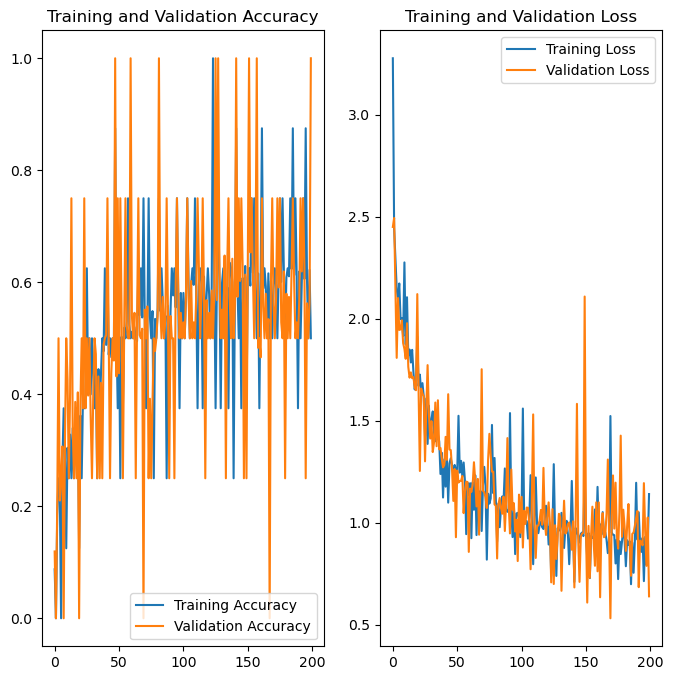

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Confusion Matrix:
[[1 0 0 0 0 0 0 1 0 1 1 1 2 1 0 1 0 1]
 [1 0 0 0 2 1 1 1 0 0 0 0 1 1 0 0 0 2]
 [0 0 0 0 3 0 1 2 0 1 0 0 0 1 0 1 0 1]
 [1 0 0 0 2 1 0 1 0 0 0 1 0 0 0 0 1 3]
 [1 0 0 0 0 0 0 1 2 0 1 1 1 0 0 0 0 3]
 [2 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 3]
 [0 0 0 0 2 3 0 0 1 1 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 2 0 0 0 1 1 0 0 3 3]
 [0 0 0 0 0 2 1 0 3 1 0 2 0 0 0 0 0 1]
 [1 0 0 0 0 0 2 0 1 1 1 0 1 0 0 2 0 1]
 [1 0 0 0 0 1 2 0 0 2 1 0 0 0 0 1 0 2]
 [0 0 0 0 2 1 1 1 1 1 0 0 0 1 0 0 0 2]
 [0 0 0 0 0 1 2 0 2 0 1 0 0 1 0 1 0 2]
 [0 0 0 0 1 3 0 0 3 0 1 0 1 0 0 0 0 1]
 [1 0 0 0 1 0 0 3 0 0 1 0 0 0 0 2 0 2]
 [0 0 0 0 2 1 0 0 3 1 0 0 0 2 0 0 0 1]
 [1 0 0 0 1 1 0 1 0 0 3 0 1 0 0 1 0 1]
 [0 0 0 0 3 0 0 0 1 1 1 1 0 1 0 1 1 0]]


<Axes: >

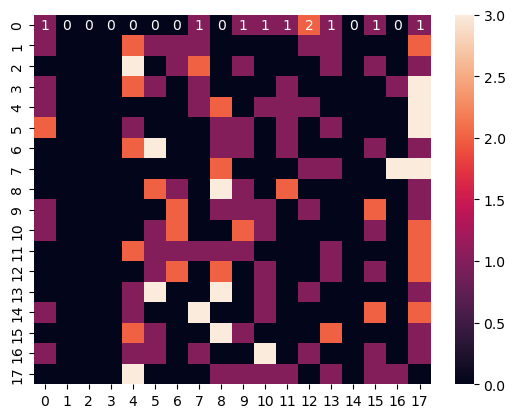

In [44]:
import seaborn as sns
sns.heatmap(cm, annot=True)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


ValueError: Asked to retrieve element 23, but the Sequence has length 23

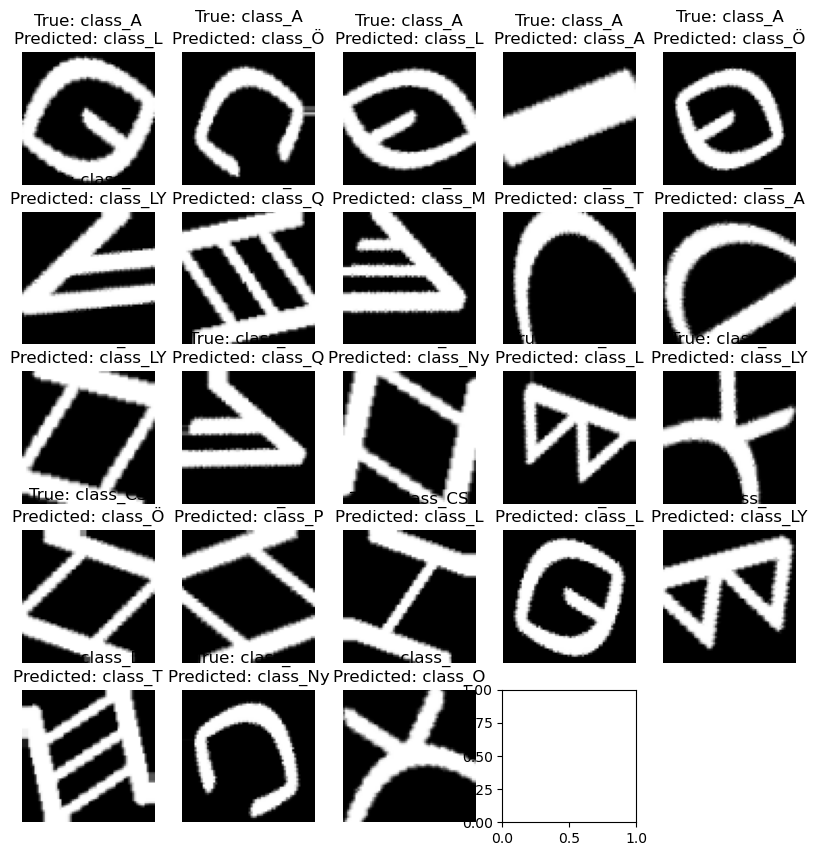

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Display images along with their true and predicted labels
plt.figure(figsize=(10, 10))
for i in range(len(y_true)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_generator[i][0][0])
    plt.axis('off')
    plt.title(f'True: {class_labels[y_true[i]]}\nPredicted: {class_labels[y_pred_labels[i]]}')
plt.show()


## 16 batch size

In [69]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu',),
    Dense(256, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_hinge', metrics=[ 'categorical_crossentropy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/100


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - categorical_crossentropy: 2.8915 - loss: 1.0017 - val_categorical_crossentropy: 2.8891 - val_loss: 1.0000
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - categorical_crossentropy: 2.8887 - loss: 1.0000 - val_categorical_crossentropy: 2.8891 - val_loss: 1.0001
Epoch 3/100
  1/143 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - categorical_crossentropy: 2.8890 - loss: 1.0001

C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_crossentropy: 2.8852 - loss: 1.0000 - val_categorical_crossentropy: 2.4573 - val_loss: 0.9961
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - categorical_crossentropy: 2.2159 - loss: 0.9400 - val_categorical_crossentropy: 2.4010 - val_loss: 1.0522
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_crossentropy: 1.6010 - loss: 0.8283 - val_categorical_crossentropy: 1.7667 - val_loss: 0.7043
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - categorical_crossentropy: 1.9924 - loss: 0.7794 - val_categorical_crossentropy: 2.3768 - val_loss: 0.8532
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_crossentropy: 1.7044 - loss: 0.5140 - val_categorical_crossentropy: 3.3129 - val_loss: 0.5060
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - categorical_crossentropy: 2.8870 - loss: 0.5984 - val_categorical_crossentropy: 2.5349 - val_loss: 0.5003
Epoch 9/100
143/143 ━━━━━━━━━━━━━━━━━

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - categorical_crossentropy: 32.7290 - loss: 0.5000 - val_categorical_crossentropy: 81.9224 - val_loss: 1.0000
Epoch 45/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_crossentropy: 24.4607 - loss: 0.4345 - val_categorical_crossentropy: 17.9478 - val_loss: 0.3523
Epoch 46/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - categorical_crossentropy: 7.9865e-06 - loss: 1.5974e-05 - val_categorical_crossentropy: 6.8745e-05 - val_loss: 1.3747e-04
Epoch 47/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_crossentropy: 17.0490 - loss: 0.3277 - val_categorical_crossentropy: 21.7809 - val_loss: 0.5255
Epoch 48/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - categorical_crossentropy: 26.4718 - loss: 0.6250 - val_categorical_crossentropy: 51.2016 - val_loss: 1.0000
Epoch 49/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_crossentropy: 20.8918 - loss: 0.4322 - val_categorical_crossentropy: 35.3853 - val_loss: 0.7291
Epoch 

Epoch 85/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - categorical_crossentropy: 250.0567 - loss: 1.0368 - val_categorical_crossentropy: 219.7376 - val_loss: 0.8425
Epoch 86/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - categorical_crossentropy: 149.0091 - loss: 0.7500 - val_categorical_crossentropy: 22.7433 - val_loss: 0.4900
Epoch 87/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - categorical_crossentropy: 214.0703 - loss: 0.8254 - val_categorical_crossentropy: 262.0332 - val_loss: 1.2164
Epoch 88/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - categorical_crossentropy: 161.7414 - loss: 1.1363 - val_categorical_crossentropy: 443.0527 - val_loss: 1.5000
Epoch 89/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_crossentropy: 236.5502 - loss: 1.0242 - val_categorical_crossentropy: 181.5726 - val_loss: 0.6693
Epoch 90/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - categorical_crossentropy: 113.8450 - loss: 0.5000 - val_categorical_crossentropy: 244.8916 - val_loss: 1.0

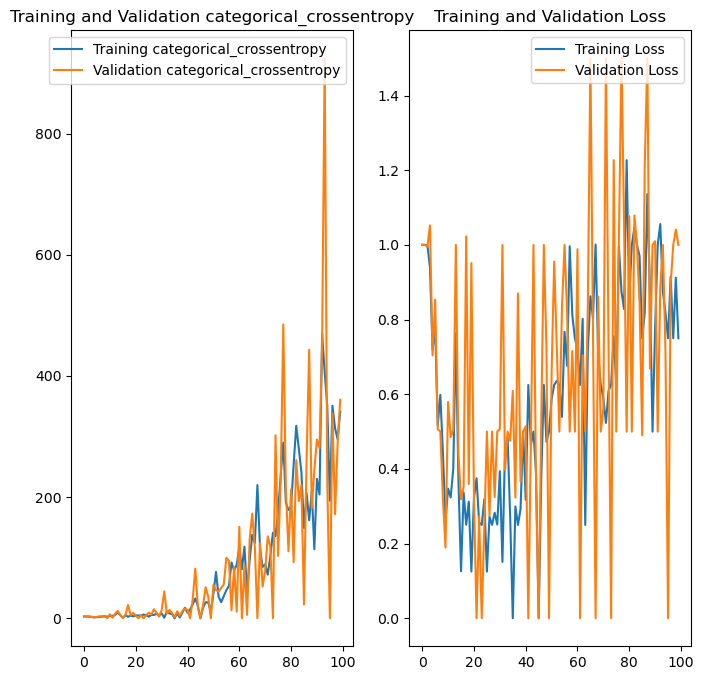

In [70]:
acc = history.history['categorical_crossentropy']
val_acc = history.history['val_categorical_crossentropy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training categorical_crossentropy')
plt.plot(epochs_range, val_acc, label='Validation categorical_crossentropy')
plt.legend(loc='upper right')
plt.title('Training and Validation categorical_crossentropy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [71]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Confusion Matrix:
[[0 0 0 0 1 0 0 1 0 0 2 3 0 2 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 1 1 1 0 1 1 1]
 [0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 1 0 3]
 [0 0 0 0 1 0 1 1 0 0 0 3 1 1 1 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 2 4 1 0 1 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 5 1 1 1 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 1 3 1 0 1 1 0 2]
 [0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 2 0 1]
 [0 0 0 0 2 0 0 1 0 0 1 2 0 0 0 1 2 1]
 [0 0 0 0 2 0 0 0 0 0 1 2 1 0 2 1 0 1]
 [0 0 0 0 0 0 0 1 0 0 5 2 0 0 0 0 1 1]
 [0 0 0 0 0 0 2 0 0 0 2 0 0 1 1 2 0 2]
 [0 0 0 0 1 0 1 0 0 0 2 4 0 2 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 2 0 0 3 0 0 2]
 [0 0 0 0 2 0 0 0 0 0 2 2 1 0 2 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 4 2 0 0 1 0 0 1]
 [0 0 0 1 1 0 1 1 0 0 1 2 0 0 2 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 3 2 0 2 1 0 1 1]]


<Axes: >

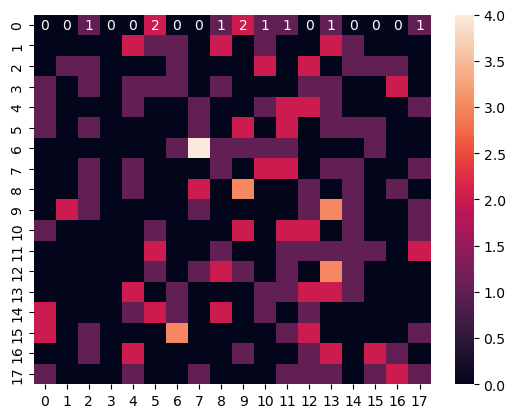

In [58]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<Axes: >

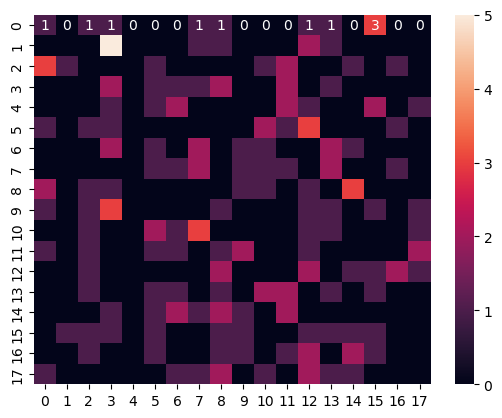

In [63]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<Axes: >

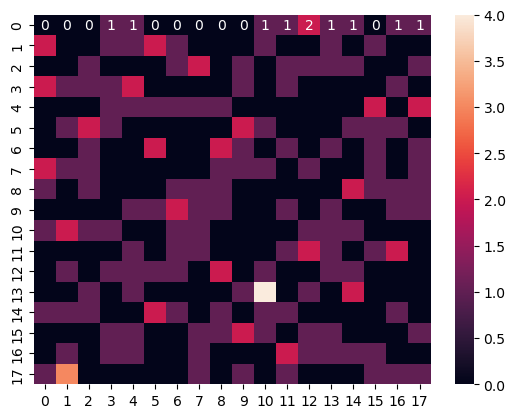

In [68]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<Axes: >

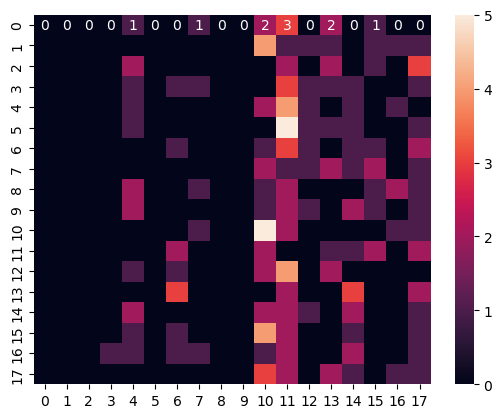

In [72]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [90]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu',),
    Dense(256, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_hinge', metrics=[ 'categorical_crossentropy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=200,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/200


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - categorical_crossentropy: 2.8871 - loss: 1.0042 - val_categorical_crossentropy: 2.8899 - val_loss: 1.0001
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.8899 - loss: 1.0001 - val_categorical_crossentropy: 2.8900 - val_loss: 1.0001
Epoch 3/200


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 2.8898 - loss: 1.0001 - val_categorical_crossentropy: 2.8891 - val_loss: 1.0000
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.8892 - loss: 1.0000 - val_categorical_crossentropy: 2.8894 - val_loss: 1.0000
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 2.8888 - loss: 1.0000 - val_categorical_crossentropy: 2.8860 - val_loss: 0.9999
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.8865 - loss: 0.9999 - val_categorical_crossentropy: 2.8865 - val_loss: 1.0000
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 2.8649 - loss: 0.9966 - val_categorical_crossentropy: 2.6556 - val_loss: 0.9309
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.5806 - loss: 0.9070 - val_categorical_crossentropy: 2.8044 - val_loss: 0.9848
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - c

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 0.0230 - loss: 0.0172 - val_categorical_crossentropy: 9.6223e-04 - val_loss: 0.0018
Epoch 46/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 4.3483e-04 - loss: 8.5991e-04 - val_categorical_crossentropy: 2.8361e-05 - val_loss: 5.5050e-05
Epoch 47/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - categorical_crossentropy: 0.0278 - loss: 0.0129 - val_categorical_crossentropy: 0.0047 - val_loss: 0.0084
Epoch 48/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.0243 - loss: 0.0255 - val_categorical_crossentropy: 0.0333 - val_loss: 0.0342
Epoch 49/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 0.0021 - loss: 0.0018 - val_categorical_crossentropy: 0.0063 - val_loss: 0.0099
Epoch 50/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.0012 - loss: 0.0023 - val_categorical_crossentropy: 0.0119 - val_loss: 0.0178
Epoch 51/200
35/35 ━━━━━━━━━━━

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 1.3672e-05 - loss: 2.7200e-05 - val_categorical_crossentropy: 0.1050 - val_loss: 0.0668
Epoch 87/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 0.0037 - loss: 0.0031 - val_categorical_crossentropy: 6.4823e-05 - val_loss: 1.2918e-04
Epoch 88/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.0011 - loss: 0.0021 - val_categorical_crossentropy: 9.6474e-06 - val_loss: 1.9295e-05
Epoch 89/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 0.0306 - loss: 0.0139 - val_categorical_crossentropy: 0.2082 - val_loss: 0.0383
Epoch 90/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.1281 - loss: 0.0314 - val_categorical_crossentropy: 1.1361e-05 - val_loss: 2.2610e-05
Epoch 91/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 0.0902 - loss: 0.0300 - val_categorical_crossentropy: 0.2216 - val_loss: 0.0343
Epoch 92/200
35/35

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 0.0220 - loss: 0.0088 - val_categorical_crossentropy: 0.1100 - val_loss: 0.0342
Epoch 128/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.0040 - loss: 0.0070 - val_categorical_crossentropy: 0.3279 - val_loss: 0.0769
Epoch 129/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 0.0206 - loss: 0.0077 - val_categorical_crossentropy: 0.3350 - val_loss: 0.0830
Epoch 130/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 8.5682e-08 - loss: 1.7367e-07 - val_categorical_crossentropy: 2.8861e-06 - val_loss: 5.7527e-06
Epoch 131/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 0.0552 - loss: 0.0096 - val_categorical_crossentropy: 0.1001 - val_loss: 0.0296
Epoch 132/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 5.5879e-09 - loss: 9.9828e-09 - val_categorical_crossentropy: 3.5093e-04 - val_loss: 6.8528e-04
Epoch 133/200

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 5.5879e-09 - loss: 1.1034e-08 - val_categorical_crossentropy: 3.2470e-04 - val_loss: 6.4395e-04
Epoch 169/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 0.0089 - loss: 0.0031 - val_categorical_crossentropy: 0.4559 - val_loss: 0.0898
Epoch 170/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.1581 - loss: 0.0843 - val_categorical_crossentropy: 0.7654 - val_loss: 0.0774
Epoch 171/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 0.4431 - loss: 0.0347 - val_categorical_crossentropy: 0.4217 - val_loss: 0.0763
Epoch 172/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.0032 - loss: 0.0058 - val_categorical_crossentropy: 0.2872 - val_loss: 0.0767
Epoch 173/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - categorical_crossentropy: 0.1676 - loss: 0.0292 - val_categorical_crossentropy: 0.1488 - val_loss: 0.0452
Epoch 174/200
35/35 ━━━━━━━━━

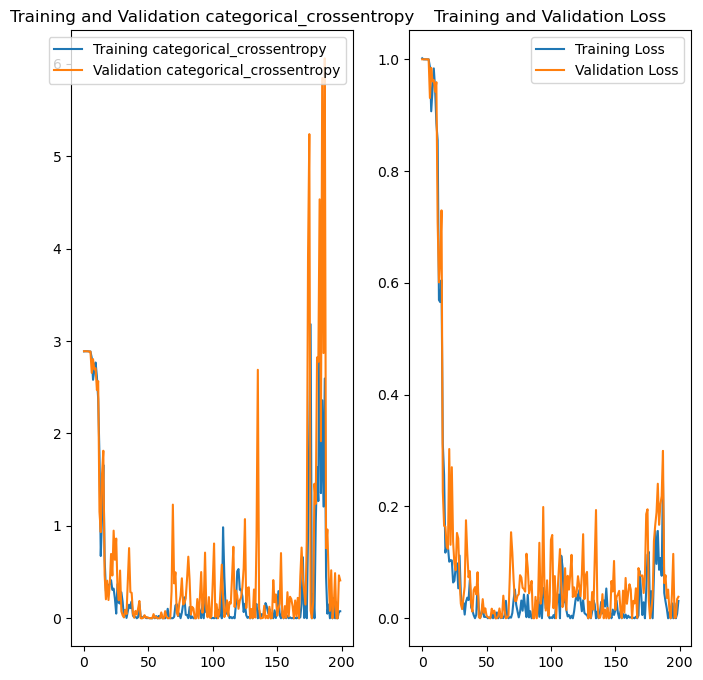

In [92]:
acc = history.history['categorical_crossentropy']
val_acc = history.history['val_categorical_crossentropy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training categorical_crossentropy')
plt.plot(epochs_range, val_acc, label='Validation categorical_crossentropy')
plt.legend(loc='upper right')
plt.title('Training and Validation categorical_crossentropy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/stepWARNING:tensorflow:6 out of the last 29 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001C13CE0EB60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


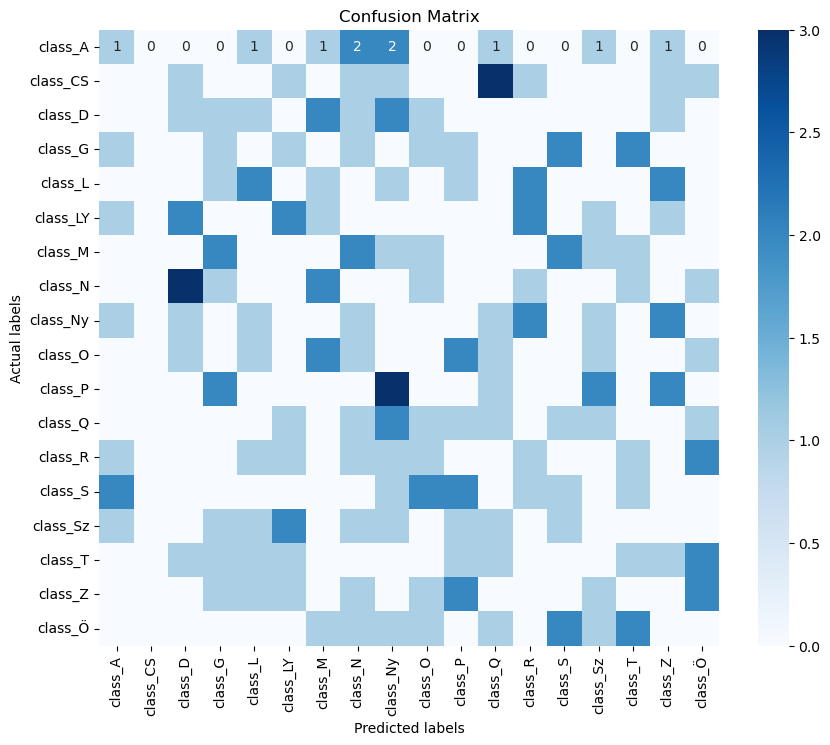

In [89]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


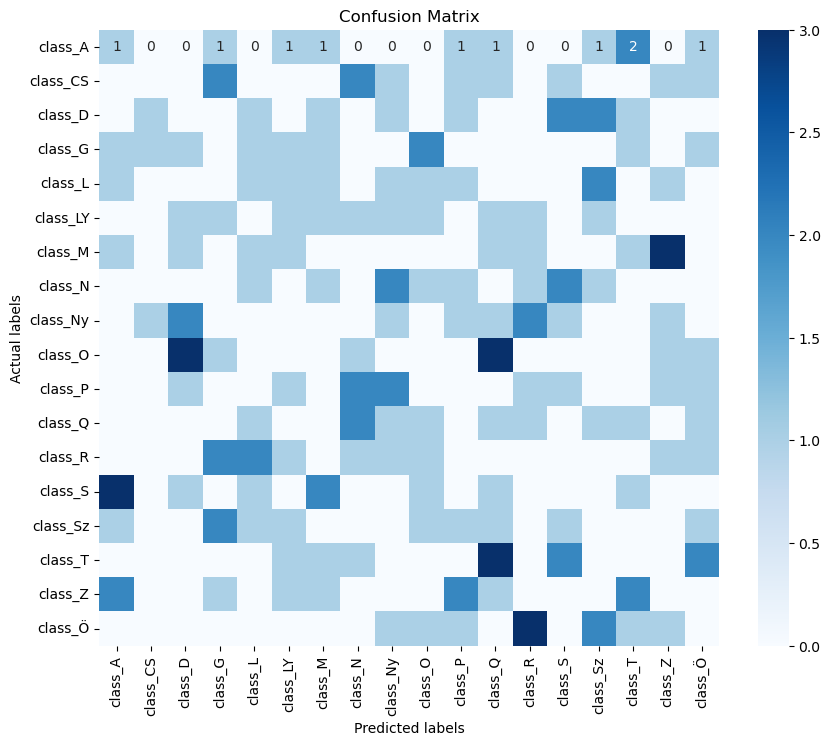

In [93]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [94]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu',),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_hinge', metrics=[ 'categorical_crossentropy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=200,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/200


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - categorical_crossentropy: 2.8888 - loss: 1.0023 - val_categorical_crossentropy: 2.8901 - val_loss: 1.0001
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.8899 - loss: 1.0001 - val_categorical_crossentropy: 2.8899 - val_loss: 1.0001
Epoch 3/200


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 2.8900 - loss: 1.0000 - val_categorical_crossentropy: 2.8897 - val_loss: 1.0000
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.8896 - loss: 1.0000 - val_categorical_crossentropy: 2.8896 - val_loss: 1.0000
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 2.8894 - loss: 1.0000 - val_categorical_crossentropy: 2.8883 - val_loss: 1.0000
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.8881 - loss: 1.0000 - val_categorical_crossentropy: 2.8884 - val_loss: 1.0000
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 2.8866 - loss: 1.0000 - val_categorical_crossentropy: 2.8748 - val_loss: 0.9998
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.8760 - loss: 0.9998 - val_categorical_crossentropy: 2.8754 - val_loss: 0.9998
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - c

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 0.4648 - loss: 0.0771 - val_categorical_crossentropy: 1.2961 - val_loss: 0.1594
Epoch 46/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.0010 - loss: 0.0020 - val_categorical_crossentropy: 0.6237 - val_loss: 0.1344
Epoch 47/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 0.7767 - loss: 0.0787 - val_categorical_crossentropy: 1.4361 - val_loss: 0.2098
Epoch 48/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.3671 - loss: 0.0351 - val_categorical_crossentropy: 1.7034 - val_loss: 0.1966
Epoch 49/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 0.3079 - loss: 0.0576 - val_categorical_crossentropy: 0.3837 - val_loss: 0.1092
Epoch 50/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.6974 - loss: 0.1156 - val_categorical_crossentropy: 0.4271 - val_loss: 0.1240
Epoch 51/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/st

Epoch 87/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 0.6184 - loss: 0.0605 - val_categorical_crossentropy: 1.9644 - val_loss: 0.1999
Epoch 88/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.5766 - loss: 0.0562 - val_categorical_crossentropy: 1.1151 - val_loss: 0.1539
Epoch 89/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 0.8281 - loss: 0.0790 - val_categorical_crossentropy: 0.6289 - val_loss: 0.0839
Epoch 90/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 1.5193 - loss: 0.1583 - val_categorical_crossentropy: 1.5222e-06 - val_loss: 3.0402e-06
Epoch 91/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - categorical_crossentropy: 0.5162 - loss: 0.0476 - val_categorical_crossentropy: 1.3941 - val_loss: 0.1542
Epoch 92/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 1.0167 - loss: 0.0936 - val_categorical_crossentropy: 0.4337 - val_loss: 0.0385
Epoch 93/200
35/35 ━━━━━━━━━━

Epoch 129/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - categorical_crossentropy: 2.8045 - loss: 0.1193 - val_categorical_crossentropy: 0.5499 - val_loss: 0.0933
Epoch 130/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 1.3409 - loss: 0.1001 - val_categorical_crossentropy: 0.0025 - val_loss: 0.0046
Epoch 131/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 2.0723 - loss: 0.1043 - val_categorical_crossentropy: 7.0662 - val_loss: 0.1706
Epoch 132/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 4.1088 - loss: 0.1563 - val_categorical_crossentropy: 7.6486 - val_loss: 0.2394
Epoch 133/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 8.1593 - loss: 0.1971 - val_categorical_crossentropy: 8.0102 - val_loss: 0.2325
Epoch 134/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 4.0204 - loss: 0.1588 - val_categorical_crossentropy: 4.0905 - val_loss: 0.0769
Epoch 135/200
35/35 ━━━━━━━━━━━

Epoch 171/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - categorical_crossentropy: 13.7547 - loss: 0.1784 - val_categorical_crossentropy: 17.8582 - val_loss: 0.2958
Epoch 172/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 13.0342 - loss: 0.2193 - val_categorical_crossentropy: 22.6132 - val_loss: 0.3078
Epoch 173/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - categorical_crossentropy: 22.0818 - loss: 0.3472 - val_categorical_crossentropy: 22.6056 - val_loss: 0.3431
Epoch 174/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 19.6725 - loss: 0.2500 - val_categorical_crossentropy: 16.3258 - val_loss: 0.2895
Epoch 175/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 41.3895 - loss: 0.3243 - val_categorical_crossentropy: 17.2202 - val_loss: 0.3433
Epoch 176/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 21.5225 - loss: 0.1250 - val_categorical_crossentropy: 20.7278 - val_loss: 0.3638
Epoch 177/200
35/35

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


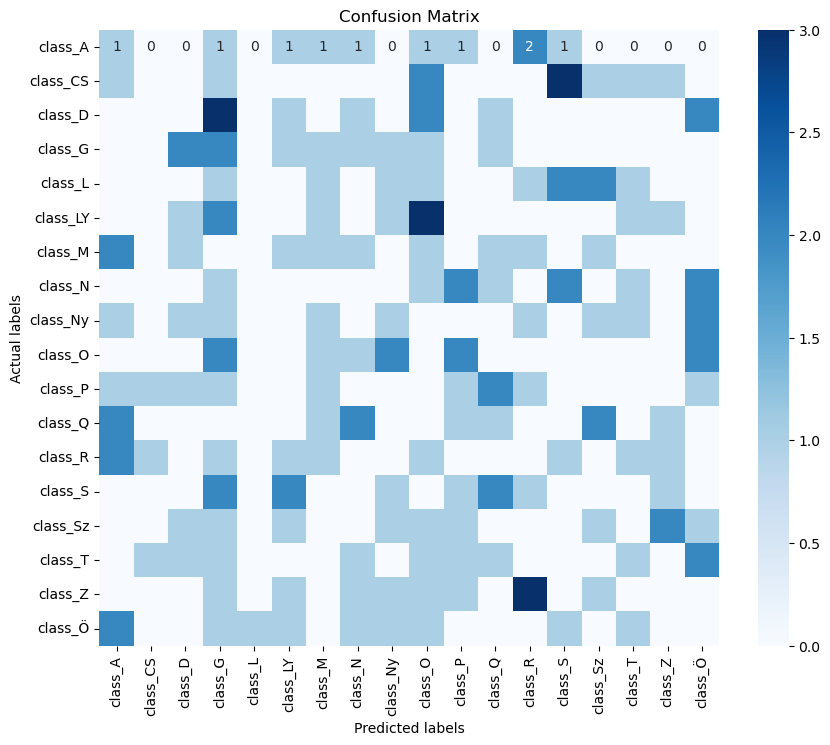

In [95]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [96]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu',),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_hinge', metrics=[ 'categorical_crossentropy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=200,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/200


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - categorical_crossentropy: 2.8906 - loss: 1.0022 - val_categorical_crossentropy: 2.8899 - val_loss: 1.0001
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.8900 - loss: 1.0001 - val_categorical_crossentropy: 2.8899 - val_loss: 1.0001
Epoch 3/200


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 2.8897 - loss: 1.0000 - val_categorical_crossentropy: 2.8892 - val_loss: 1.0000
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.8891 - loss: 1.0000 - val_categorical_crossentropy: 2.8892 - val_loss: 1.0000
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 2.8887 - loss: 1.0000 - val_categorical_crossentropy: 2.8867 - val_loss: 1.0000
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.8855 - loss: 0.9999 - val_categorical_crossentropy: 2.8855 - val_loss: 1.0000
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - categorical_crossentropy: 2.8828 - loss: 0.9999 - val_categorical_crossentropy: 2.8768 - val_loss: 1.0006
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 2.8806 - loss: 1.0008 - val_categorical_crossentropy: 2.8819 - val_loss: 1.0009
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - c

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 3.6633 - loss: 0.2296 - val_categorical_crossentropy: 7.8390 - val_loss: 0.2135
Epoch 46/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.4122 - loss: 0.1536 - val_categorical_crossentropy: 0.4137 - val_loss: 0.1444
Epoch 47/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 3.3189 - loss: 0.1731 - val_categorical_crossentropy: 5.9804 - val_loss: 0.3275
Epoch 48/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 3.8740 - loss: 0.3557 - val_categorical_crossentropy: 5.3501 - val_loss: 0.4058
Epoch 49/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 4.1206 - loss: 0.2340 - val_categorical_crossentropy: 0.5592 - val_loss: 0.1061
Epoch 50/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 7.2478 - loss: 0.3097 - val_categorical_crossentropy: 2.5208 - val_loss: 0.1496
Epoch 51/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/st

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 18.0294 - loss: 0.1396 - val_categorical_crossentropy: 0.9615 - val_loss: 0.1164
Epoch 88/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 3.2190 - loss: 0.0617 - val_categorical_crossentropy: 10.0603 - val_loss: 0.0864
Epoch 89/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - categorical_crossentropy: 9.7141 - loss: 0.1239 - val_categorical_crossentropy: 10.6695 - val_loss: 0.1721
Epoch 90/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 4.3807 - loss: 0.1253 - val_categorical_crossentropy: 2.3606 - val_loss: 0.2285
Epoch 91/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 9.2072 - loss: 0.0815 - val_categorical_crossentropy: 4.2353 - val_loss: 0.1387
Epoch 92/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 8.5845 - loss: 0.1010 - val_categorical_crossentropy: 5.5197 - val_loss: 0.1923
Epoch 93/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms

Epoch 129/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - categorical_crossentropy: 3.9565 - loss: 0.1091 - val_categorical_crossentropy: 14.0625 - val_loss: 0.3226
Epoch 130/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 7.5986 - loss: 0.1589 - val_categorical_crossentropy: 11.1815 - val_loss: 0.2691
Epoch 131/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 8.0537 - loss: 0.2027 - val_categorical_crossentropy: 10.0362 - val_loss: 0.1883
Epoch 132/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 0.5660 - loss: 0.0313 - val_categorical_crossentropy: 1.8408 - val_loss: 0.0772
Epoch 133/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 9.0641 - loss: 0.0927 - val_categorical_crossentropy: 11.3147 - val_loss: 0.2655
Epoch 134/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 1.5577 - loss: 0.0682 - val_categorical_crossentropy: 4.8203 - val_loss: 0.1922
Epoch 135/200
35/35 ━━━━━━━

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 60.4937 - loss: 0.1885 - val_categorical_crossentropy: 4.5099 - val_loss: 0.0769
Epoch 171/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 59.2989 - loss: 0.2320 - val_categorical_crossentropy: 168.1163 - val_loss: 0.3289
Epoch 172/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 28.3316 - loss: 0.1570 - val_categorical_crossentropy: 99.1120 - val_loss: 0.3038
Epoch 173/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_crossentropy: 114.7301 - loss: 0.2422 - val_categorical_crossentropy: 235.6048 - val_loss: 0.2940
Epoch 174/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_crossentropy: 114.7117 - loss: 0.1563 - val_categorical_crossentropy: 58.4114 - val_loss: 0.4224
Epoch 175/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - categorical_crossentropy: 133.0798 - loss: 0.2453 - val_categorical_crossentropy: 27.9325 - val_loss: 0.2639
Epoch 176/200
35/35 ━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


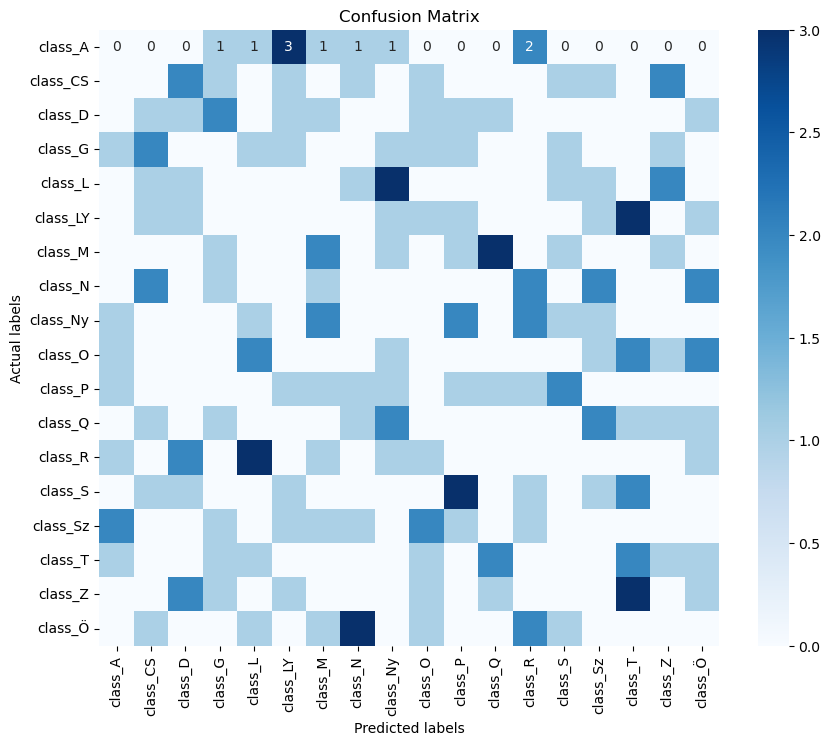

In [97]:

# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 8
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 30% of the data will be used for validation
)

# Load and split data from the same directory
train_generator = datagen.flow_from_directory(
    'data_split_old_hungarian/train',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'data_split_old_hungarian/val',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' )
test_generator = datagen.flow_from_directory(
    'data_split_old_hungarian/test',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset for testing data
)

Found 2294 images belonging to 18 classes.
Found 180 images belonging to 18 classes.
Found 180 images belonging to 18 classes.


In [100]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/20


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  6/286 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.0128 - loss: 2.9844   

C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


286/286 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.4716 - loss: 1.6253 - val_accuracy: 0.8239 - val_loss: 0.5299
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - accuracy: 0.7500 - loss: 0.4194 - val_accuracy: 1.0000 - val_loss: 0.0639
Epoch 3/20
  1/286 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 1.0000 - loss: 0.3584

C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8985 - loss: 0.2769 - val_accuracy: 0.8920 - val_loss: 0.3232
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.8750 - loss: 0.6765 - val_accuracy: 0.7500 - val_loss: 0.5227
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9692 - loss: 0.1025 - val_accuracy: 0.9489 - val_loss: 0.1365
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 138us/step - accuracy: 1.0000 - loss: 0.0363 - val_accuracy: 1.0000 - val_loss: 0.0169
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9592 - loss: 0.1107 - val_accuracy: 0.9716 - val_loss: 0.0764
Epoch 8/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 104us/step - accuracy: 1.0000 - loss: 0.0273 - val_accuracy: 1.0000 - val_loss: 0.0526
Epoch 9/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9935 - loss: 0.0226 - val_accuracy: 0.9886 - val_loss: 0.0472
Epoch 10/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 107us/step - accuracy: 1.0000 - loss: 4.8515e-05 - val_accura

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


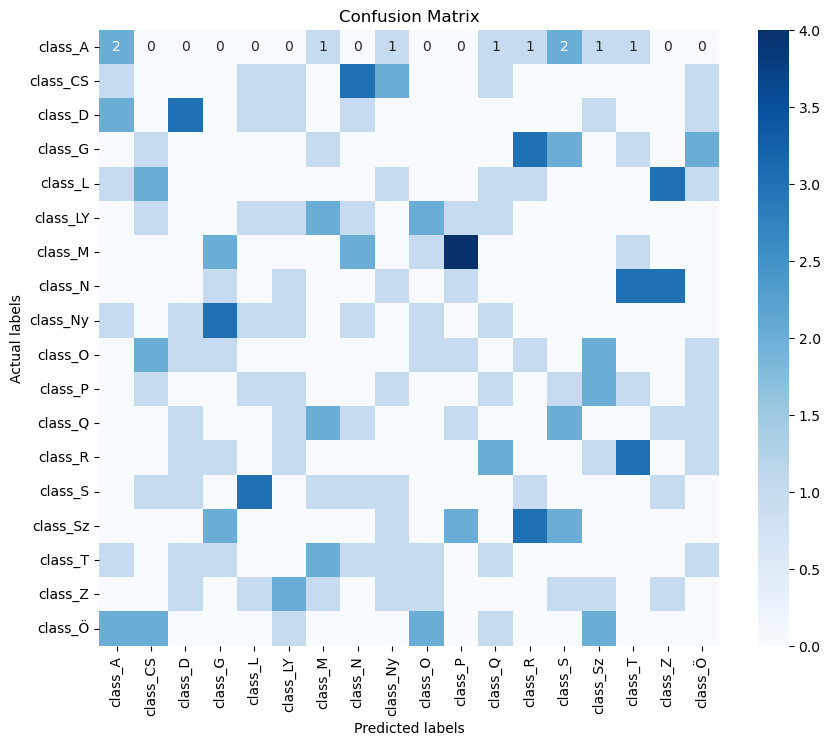

In [101]:
import seaborn as sns
# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

# 90 degree rotation

In [103]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 8
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 30% of the data will be used for validation
)

# Load and split data from the same directory
train_generator = datagen.flow_from_directory(
    'data_split_old_hungarian2/train',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'data_split_old_hungarian2/val',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' )
test_generator = datagen.flow_from_directory(
    'data_split_old_hungarian2/test',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset for testing data
)

Found 792 images belonging to 18 classes.
Found 54 images belonging to 18 classes.
Found 54 images belonging to 18 classes.


In [104]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/20


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/99 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1353 - loss: 2.9341

C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3280 - loss: 2.1945 - val_accuracy: 0.6667 - val_loss: 0.9439
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 1.0304
Epoch 3/20
 4/99 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9167 - loss: 0.5935

C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8216 - loss: 0.5152 - val_accuracy: 0.8333 - val_loss: 0.5827
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.8238
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9088 - loss: 0.2278 - val_accuracy: 0.8958 - val_loss: 0.2423
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2182
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9495 - loss: 0.1548 - val_accuracy: 0.8125 - val_loss: 0.4621
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1369
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9542 - loss: 0.1230 - val_accuracy: 0.8958 - val_loss: 0.3977
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


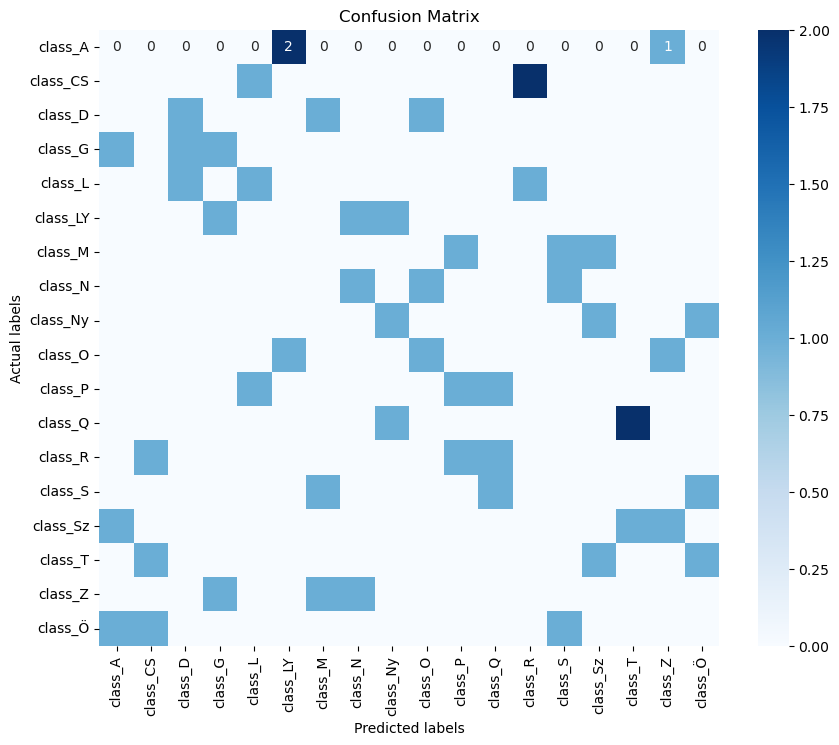

In [105]:
import seaborn as sns
# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [110]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu',),
    Dense(256, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_hinge', metrics=[ 'categorical_crossentropy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=200,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/200


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - categorical_crossentropy: 2.8871 - loss: 1.0034 - val_categorical_crossentropy: 2.8613 - val_loss: 1.0002
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 2.8674 - val_loss: 1.0008
Epoch 3/200
 6/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 2.8345 - loss: 0.9989

C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 2.2412 - loss: 0.9084 - val_categorical_crossentropy: 2.9343 - val_loss: 1.1635
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 1.3736 - val_loss: 0.7815
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 1.2147 - loss: 0.5626 - val_categorical_crossentropy: 1.7440 - val_loss: 0.8021
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 0.8905 - val_loss: 0.5912
Epoch 7/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 0.5750 - loss: 0.2560 - val_categorical_crossentropy: 5.7928 - val_loss: 0.8618
Epoch 8/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 2.7784 - val_loss: 0.7730
Epoch 9/200
99/99 ━━━━━━━

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 9.8515 - val_loss: 0.3333
Epoch 45/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_crossentropy: 6.6190 - loss: 0.1863 - val_categorical_crossentropy: 11.6963 - val_loss: 0.4717
Epoch 46/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 3.5479 - val_loss: 0.3333
Epoch 47/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_crossentropy: 6.3431 - loss: 0.2330 - val_categorical_crossentropy: 11.7753 - val_loss: 0.3764
Epoch 48/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 14.2370 - val_loss: 0.4166
Epoch 49/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 4.9424 - loss: 0.1865 - val_categorical_crossentropy: 11.5276 - val_loss: 0.3685
Epoch 50/200
99/

Epoch 85/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 15.4459 - loss: 0.3616 - val_categorical_crossentropy: 37.3480 - val_loss: 0.5456
Epoch 86/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 81.2060 - val_loss: 1.0000
Epoch 87/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 16.0905 - loss: 0.2755 - val_categorical_crossentropy: 27.8118 - val_loss: 0.5018
Epoch 88/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 71.3189 - val_loss: 0.6667
Epoch 89/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 12.5575 - loss: 0.2517 - val_categorical_crossentropy: 28.9862 - val_loss: 0.4322
Epoch 90/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 0.0000e+00 - val_loss: 0.

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 12.7849 - loss: 0.1895 - val_categorical_crossentropy: 25.8614 - val_loss: 0.3328
Epoch 126/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 56.5439 - val_loss: 0.6667
Epoch 127/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 14.2603 - loss: 0.1613 - val_categorical_crossentropy: 32.1144 - val_loss: 0.4167
Epoch 128/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 40.0851 - val_loss: 1.0000
Epoch 129/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 13.3255 - loss: 0.1521 - val_categorical_crossentropy: 20.5752 - val_loss: 0.3742
Epoch 130/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 7.4311 - val_loss: 0.6573
Epoch 1

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 19.8562 - loss: 0.2451 - val_categorical_crossentropy: 36.5317 - val_loss: 0.4126
Epoch 166/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 64.7841 - val_loss: 0.3333
Epoch 167/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 26.5324 - loss: 0.2498 - val_categorical_crossentropy: 21.0196 - val_loss: 0.2500
Epoch 168/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 161.8480 - val_loss: 1.0000
Epoch 169/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_crossentropy: 27.8012 - loss: 0.2834 - val_categorical_crossentropy: 31.4111 - val_loss: 0.3333
Epoch 170/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - categorical_crossentropy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_crossentropy: 53.1808 - val_loss: 0.3333
Epoch

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


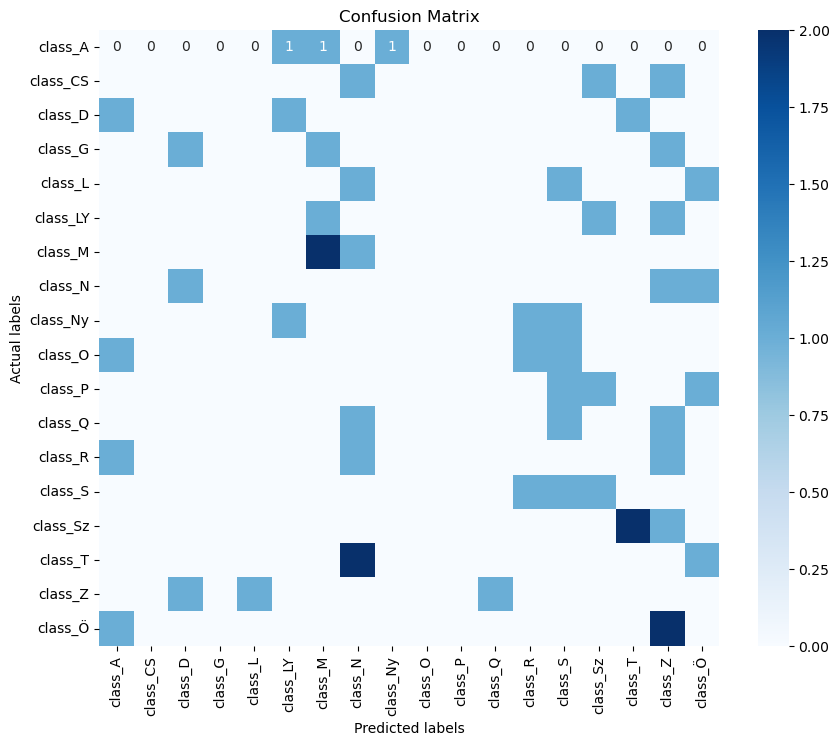

In [111]:
import seaborn as sns
# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [112]:
model.save('hung_large.h5')

In [118]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu',),
    Dense(256, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/100


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.2858 - loss: 2.2881 - val_accuracy: 0.6250 - val_loss: 1.0436
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.5508
Epoch 3/100
 5/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8167 - loss: 0.5369

C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8002 - loss: 0.5134 - val_accuracy: 0.7500 - val_loss: 0.8071
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.2480
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8946 - loss: 0.2977 - val_accuracy: 0.7917 - val_loss: 0.6984
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.5043
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9257 - loss: 0.2341 - val_accuracy: 0.9375 - val_loss: 0.1146
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0789
Epoch 9/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9706 - loss: 0.0770 - val_accuracy: 0.8542 - val_loss: 0.5087
Epoch 10/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.0000e+00 - loss: 0.00

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9991 - loss: 0.0088 - val_accuracy: 0.9792 - val_loss: 0.0911
Epoch 52/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0217
Epoch 53/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9716 - loss: 0.1131 - val_accuracy: 0.9583 - val_loss: 0.1826
Epoch 54/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0662
Epoch 55/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9933 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 0.0401
Epoch 56/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0551
Epoch 57/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9849 - loss: 0.0491 - val_accuracy: 0.9375 - val_loss: 0.3125
Epoch 58/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.0000e+00 - loss

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 8.5317e-04 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 100/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 6.3578e-07


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


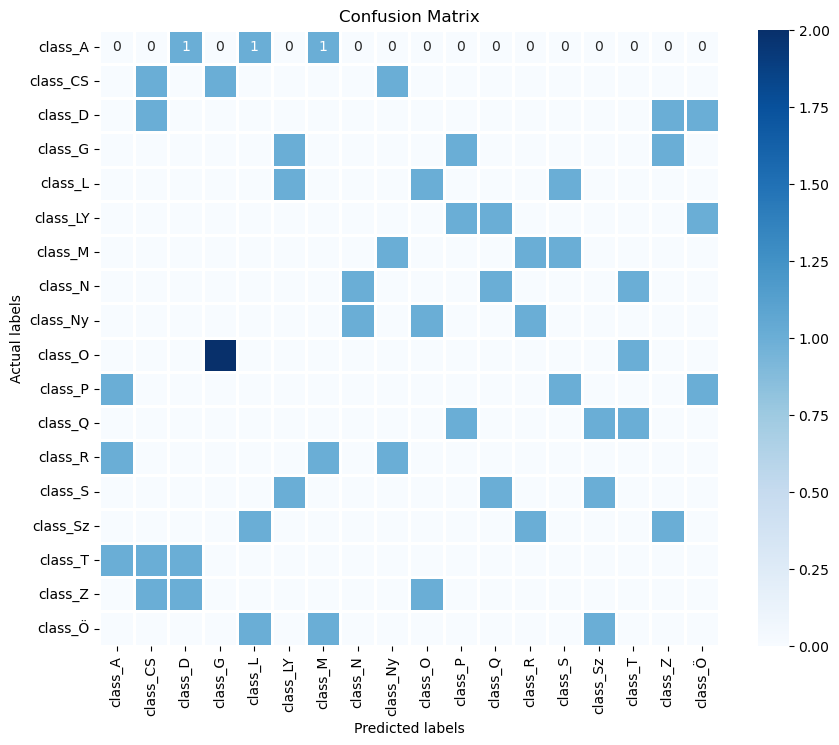

In [119]:
import seaborn as sns
# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', linewidths=1, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


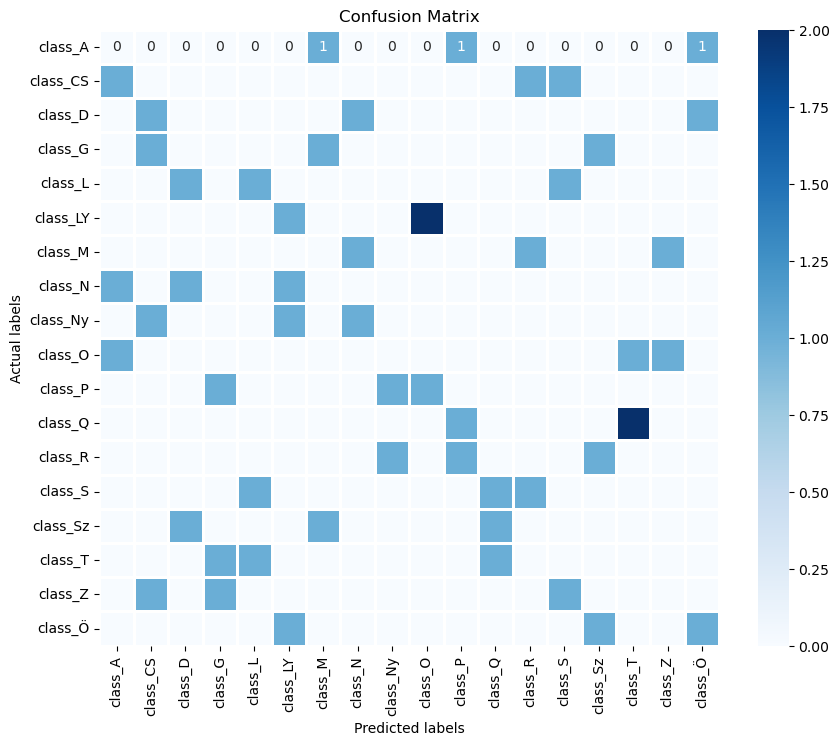

In [117]:
import seaborn as sns
# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', linewidths=1, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [120]:
model.save('hung_large1.h5')

In [122]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu',),
    Dense(256, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/100


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.3209 - loss: 2.1483 - val_accuracy: 0.6719 - val_loss: 0.7871
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.5430 - val_accuracy: 0.6923 - val_loss: 0.8414
Epoch 3/100


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7906 - loss: 0.5196 - val_accuracy: 0.8750 - val_loss: 0.3442
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2398 - val_accuracy: 0.8846 - val_loss: 0.2953
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9361 - loss: 0.1757 - val_accuracy: 0.9766 - val_loss: 0.1207
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9531 - loss: 0.1270 - val_accuracy: 0.9615 - val_loss: 0.0896
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9492 - loss: 0.1360 - val_accuracy: 0.9609 - val_loss: 0.1532
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0861 - val_accuracy: 0.9423 - val_loss: 0.1058
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9888 - loss: 0.0381 - val_accuracy: 0.9766 - val_loss: 0.0609
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0623 - val_accuracy: 1.0000 - val_loss

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 1.0000 - loss: 5.6076e-05 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 54/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.1541e-05 - val_accuracy: 0.9808 - val_loss: 0.0442
Epoch 55/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 1.0000 - loss: 6.4508e-05 - val_accuracy: 0.9922 - val_loss: 0.0121
Epoch 56/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5146e-05 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 57/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 1.0000 - loss: 4.8057e-05 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 58/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5029e-05 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 59/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 1.0000 - loss: 4.7550e-05 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 60/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3662

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


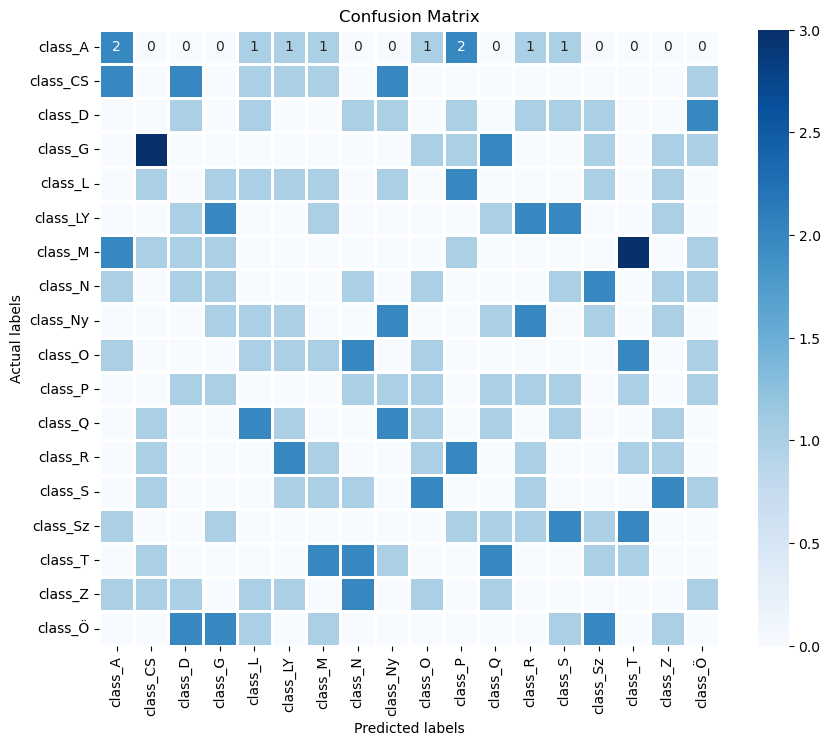

In [123]:
import seaborn as sns
# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', linewidths=1, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [124]:
model.save("model_5l_64b_100e.h5")

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics